#  Использование одномерных сверток в PyTorch

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html
* https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.html#torch.nn.MaxPool1d
* https://wandb.ai/wandb_fc/wb-tutorials/reports/Tutorial-Text-Classification-Using-CNNs--Vmlldzo0NTIxNDI5
* https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

## Задачи для совместного разбора

1\. Изучите принцип работы одномерных сверточных слоев в `torch`

![1d conv](https://raw.githubusercontent.com/krzjoa/krzjoa.github.io/master/assets/img/2020-10-03-ts-and-torch-1/conv1d.gif)

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
X = th.randint(0, 10, size=(10, 1, 6)).float()
X.shape

torch.Size([10, 1, 6])

In [ ]:
conv = nn.Conv1d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    bias=False,
)

In [ ]:
out = conv(X)
out.shape

torch.Size([10, 1, 4])

In [ ]:
conv.weight, conv.weight.shape

(Parameter containing:
 tensor([[[ 0.5633, -0.1533, -0.0749]]], requires_grad=True),
 torch.Size([1, 1, 3]))

In [ ]:
X

In [ ]:
X[0, 0, 0:3] @ conv.weight[0][0]

tensor(-0.8061, grad_fn=<DotBackward0>)

In [ ]:
out

![conv1d](https://api.wandb.ai/files/wandb_fc/images/projects/37754834/1f7be456.gif)

In [ ]:
conv = nn.Conv1d(in_channels=4, out_channels=1, kernel_size=2, bias=False)

In [ ]:
conv.weight.shape

torch.Size([1, 4, 2])

In [ ]:
(X[0, 0, :2] * conv.weight).sum()

tensor(-1.6079, grad_fn=<SumBackward0>)

In [ ]:
# conv(X)[0]
X.shape
conv(X)

RuntimeError: ignored

In [ ]:
conv2 = nn.Conv2d(in_channels=4, out_channels=5, kernel_size=2)
conv2.bias.shape

torch.Size([5])

In [ ]:
batch_size = 16
embedding_dim = 4
seq_len = 6
X = th.rand(batch_size, embedding_dim, seq_len)

In [ ]:
conv = nn.Conv1d(in_channels=4, out_channels=2, kernel_size=2, bias=False)

In [ ]:
conv(X)[0, 0]

tensor([ 0.1076,  0.0438,  0.1217,  0.0350, -0.0430],
       grad_fn=<SelectBackward0>)

In [ ]:
X[0].shape, conv.weight.shape

(torch.Size([4, 6]), torch.Size([2, 4, 2]))

In [ ]:
(X[0, :, 1:3] * conv.weight[0]).sum()

tensor(0.0438, grad_fn=<SumBackward0>)

In [ ]:
out = conv(X)
out.shape, X.shape

(torch.Size([16, 2, 5]), torch.Size([16, 4, 6]))

In [ ]:
conv.weight.shape

torch.Size([1, 4, 2])

In [ ]:
import torch
from torch.utils.data import Dataset, TensorDataset, random_split
from torchvision import transforms

class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [ ]:
X = th.rand(16, 5)
y = th.rand(16)

dset = TensorDataset(X, y)

train, test = random_split(dset, [0.8, 0.2])

In [ ]:
train_with_transform = DatasetFromSubset(train, transform=lambda x: 100*x)

In [ ]:
train_with_transform[0:5]

(tensor([[23.4154, 26.7615, 77.2997,  9.6030, 21.6568],
         [84.8132, 83.3371, 26.3402, 76.1748, 51.9232],
         [18.5761, 84.4556, 44.7022, 92.9388, 16.5611],
         [86.5335, 28.2121, 55.2791, 96.6043, 56.1842],
         [46.7226,  1.9431, 21.9107, 73.2349, 51.9956]]),
 tensor([0.9232, 0.9180, 0.6575, 0.8395, 0.8800]))

In [ ]:
dset[0:5]

(tensor([[0.2342, 0.2676, 0.7730, 0.0960, 0.2166],
         [0.2542, 0.6659, 0.8283, 0.3314, 0.2365],
         [0.8525, 0.6426, 0.4660, 0.1436, 0.5976],
         [0.9192, 0.7803, 0.5016, 0.5447, 0.0884],
         [0.8481, 0.8334, 0.2634, 0.7617, 0.5192]]),
 tensor([0.9232, 0.8759, 0.3127, 0.2243, 0.9180]))

In [ ]:
X = th.arange(20)
X

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])

In [ ]:
X.reshape(1, 1, -1)

tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17, 18, 19]]])

In [ ]:
[x0, x1, x2] => y3
[x1, x2, x3] => y4
[x2, x3, x4] => y5

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите данные из файла `ts.csv`. Используя модель, состоящую из одного одномерного сверточного слоя, решите задачу предсказания $y_t$ по `k` предыдущим точкам временного ряда $x_{t-k}...x_{t-1}$. Исследуйте значения $k\in[1, 7]$. Для каждого $k$ выведите на экран итоговое значение функции потерь и веса ядра свертки. Визуализируйте исходный временной ряд и полученные прогнозы.

- [ ] Проверено на семинаре

<p class="task" id="2"></p>

2\. Загрузите файл `PV_Elec_Gas2.csv`. Опишите класс `ElectricityDataset`, который разбивает данные на окна в соответствии со следующей схемой:

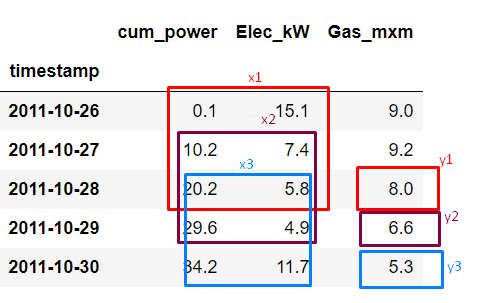

Разбейте набор данных на обучающую и тестовую выборку. Для теста оставьте данные за 2019 год.

- [ ] Проверено на семинаре

<p class="task" id="3"></p>

3\. Решите задачу предсказания столбца `Gas_mxm` на основе столбцов `cum_power` и `Elec_kW` с использованием одномерных сверток. Для оптимизации используйте мини-пакетный градиентный спуск с использованием `DataLoader`. Обратите внимание, что при создании `DataLoader` вы не можете перемешивать данные.

Постройте график изменения значения функции потерь на обучающем и тестовом множестве в зависимости от номера эпохи. Визуализируйте на одном графике прогнозы модели и предсказываемый временной ряд.

- [ ] Проверено на семинаре

<p class="task" id="4"></p>

4\. Считайте файлы `polarity/positive_reviews.csv` (положительные обзоры на фильмы) и `polarity/negative_reviews.csv` (отрицательные обозоры на фильмы) и разбейте на обучающую и тестовую выборку. Выполните предобработку текста и создайте Vocab на основе обучающей выборки (токен - слово). Выведите на экран количество токенов в полученном словаре.

Создайте класс `PolarityDataset` и реализуйте метод `__getitem__` таким образом, чтобы он возвращал набор индексов токенов (слов) для текста и метки классов для этих текстов. Создайте два объекта класса `PolarityDataset` для обучающей и тестовой выборки. Выведите на экраны количество элементов и распределение данных по классам в каждом из них.

- [ ] Проверено на семинаре

In [ ]:
from torch.utils.data import Dataset

class PolarityDataset(Dataset):
    pass

<p class="task" id="5"></p>

5\. Решите задачу классификации текстов обзоров с использованием одномерных сверток. Для преобразования последовательности индексов в последовательность векторов используйте слой `nn.Embedding`. Обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`. Выведите на экран отчет по классификации для обучающей и тестовой выборки после завершения процесса обучения. Добейтесь accuracy на тестовой выборке не менее 70%.

- [ ] Проверено на семинаре

<p class="task" id="6"></p>

6\. Придумайте небольшой отзыв, прогоните его через модель и выведите метку предсказанного класса (позитивный или негативный). Сделайте это для явно позитивного и явно негативного отзыва.

- [ ] Проверено на семинаре

## Обратная связь
- [ ] Хочу получить обратную связь по решению